In [58]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Load Dataset
df = pd.read_csv("Iris.csv")
# Dataset First Look
# View top 5 rows of the dataset
df.head()
     

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [68]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])
# Dataset Info
# Checking information about the dataset using info
df.info()

Number of rows are:  150
Number of columns are:  6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [70]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')
# Missing Values/Null Values Count
df.isnull().sum()  

number of duplicated rows are 0


Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [72]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)
     

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.06,3.76,1.20,NaN
std,43.45,0.83,0.44,1.77,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [95]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]
     
# New updated dataset
data.head()

print(data.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


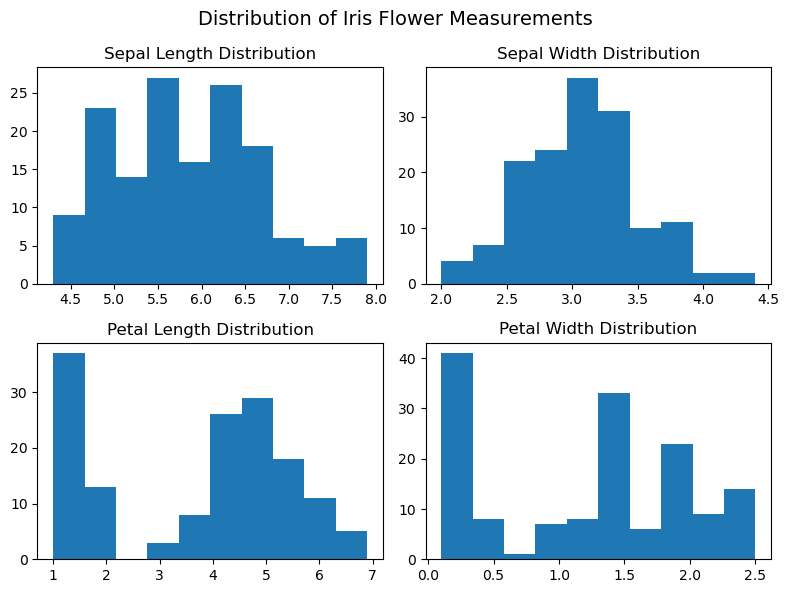

In [100]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['Sepal.Length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['Sepal.Width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['Petal.Length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['Petal.Width'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()
     

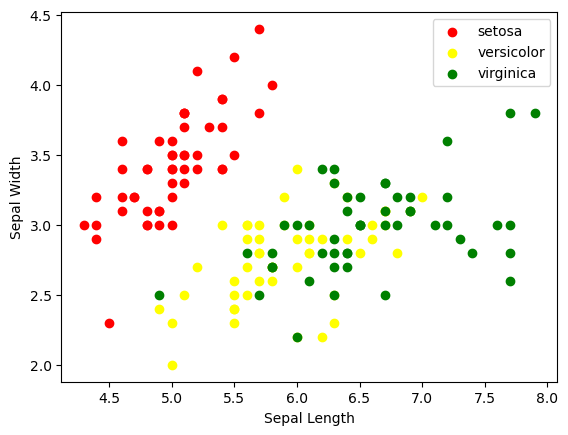

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data = sns.load_dataset('iris')

# Define colors for each species and the corresponding species labels
colors = ['red', 'yellow', 'green']
species = ['setosa', 'versicolor', 'virginica']

# Create a scatter plot for Sepal Length vs Sepal Width for each species
for i in range(len(species)):
    # Select data for the current species
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors
plt.legend()

# Display the scatter plot
plt.show()


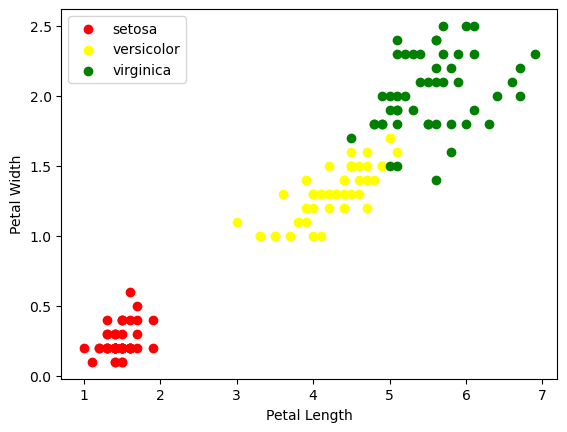

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data = sns.load_dataset('iris')

# Define colors for each species and the corresponding species labels
colors = ['red', 'yellow', 'green']
species = ['setosa', 'versicolor', 'virginica']

# Create a scatter plot for Petal Length vs Petal Width for each species
for i in range(len(species)):
    # Select data for the current species
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors
plt.legend()

# Display the scatter plot
plt.show()


In [141]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd

# Load the dataset
data = sns.load_dataset('iris')

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'species' column to convert the species names to numerical labels
data['species'] = le.fit_transform(data['species'])

# Check the unique values in the 'species' column after encoding
unique_species = data['species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species)  # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2


Encoded Species Values:
[0 1 2]


In [157]:
# Defining the X and y
x=data.drop(columns=['species'], axis=1)
y=data['species']
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)
     

# Checking the train distribution of dependent variable
y_train.value_counts()

species
1    38
2    34
0    33
Name: count, dtype: int64

In [162]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [165]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])
     


Confusion Matrix:


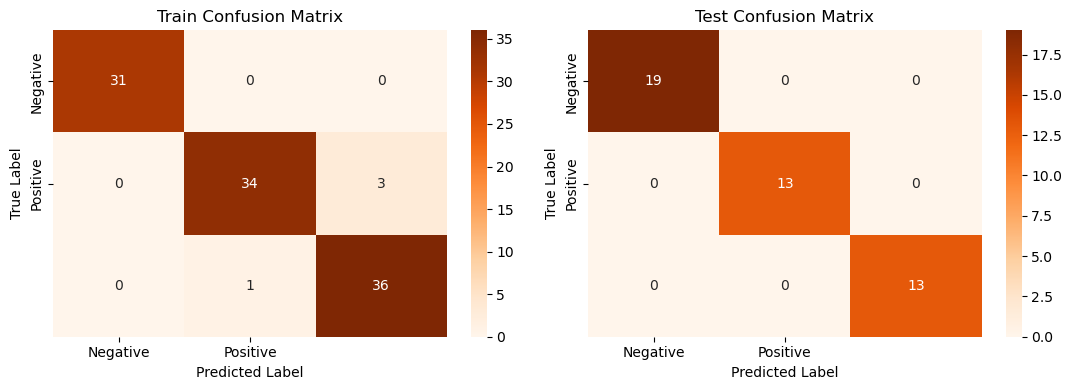


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.971429 | 0.918919 |   0.944444 |  37        |
| 2            |    0.923077 | 0.972973 |   0.947368 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.964835 | 0.963964 |   0.963938 | 105        |
| weighted avg |    0.962826 | 0.961905 |   0.961877 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = sns.load_dataset('iris')

# Encode the 'species' column to convert the species names to numerical labels
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

# Split the dataset into training and testing sets
x = data.drop(columns=['species'])
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Evaluate the Logistic Regression model using the evaluate_model function
log_reg_scores = evaluate_model(log_reg, x_train, x_test, y_train, y_test)

# Display the evaluation scores
print("Logistic Regression Evaluation Scores:")
print(f"Precision (Train): {log_reg_scores[0]:.4f}, Precision (Test): {log_reg_scores[1]:.4f}")
print(f"Recall (Train): {log_reg_scores[2]:.4f}, Recall (Test): {log_reg_scores[3]:.4f}")
print(f"Accuracy (Train): {log_reg_scores[4]:.4f}, Accuracy (Test): {log_reg_scores[5]:.4f}")
print(f"F1 Score (Train): {log_reg_scores[6]:.4f}, F1 Score (Test): {log_reg_scores[7]:.4f}")



Confusion Matrix:


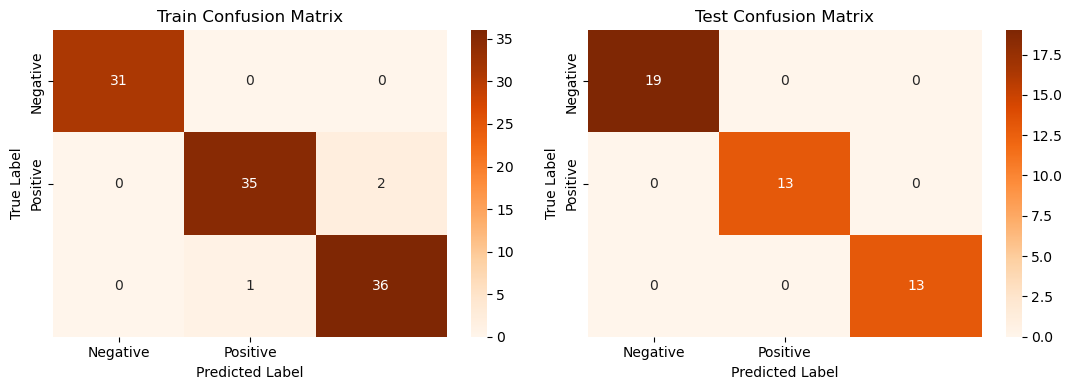


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.972222 | 0.945946 |   0.958904 |  37        |
| 2            |    0.947368 | 0.972973 |   0.96     |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.973197 | 0.972973 |   0.972968 | 105        |
| weighted avg |    0.971665 | 0.971429 |   0.971423 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [186]:
# ML Model - 2 SVM(Support Vector Machine) Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model

# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)


Confusion Matrix:


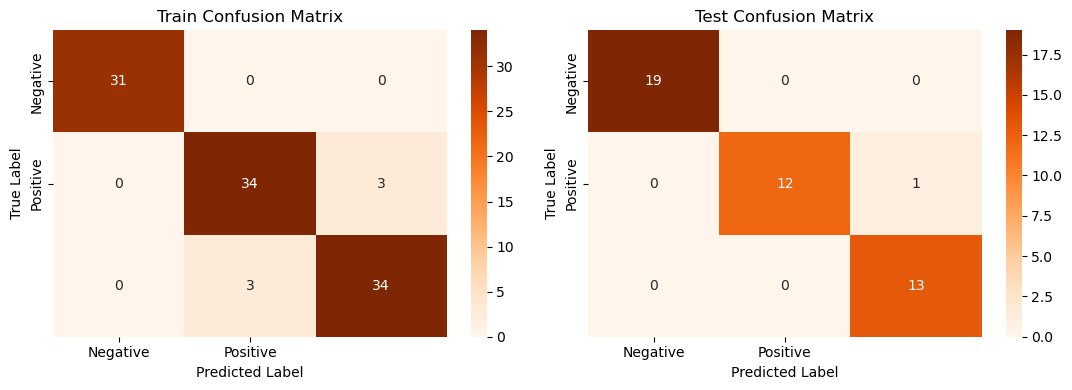


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.918919 | 0.918919 |   0.918919 |  37        |
| 2            |    0.918919 | 0.918919 |   0.918919 |  37        |
| accuracy     |    0.942857 | 0.942857 |   0.942857 |   0.942857 |
| macro avg    |    0.945946 | 0.945946 |   0.945946 | 105        |
| weighted avg |    0.942857 | 0.942857 |   0.942857 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 19        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [190]:

# ML Model - 3 Naive Bayes Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)
     